In [1]:
#https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features
#Contains explanation of features


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy.random as rng
import random
from random import randrange

random.seed(20)
randomState = 309


dataset = pd.read_csv('training-data/alternative.csv')
df = dataset.copy(deep=True)

print(df.shape)

dataset = pd.read_csv('training-data/blues.csv')
dataset.rename(inplace=True, columns={'instnce_id':'instance_id'})#Typo in dataset
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/childrens music.csv')
#Songs that contain a swear word are in fact, unlikely to be a childrens song
dataset = dataset[dataset['track_name'].str.contains('fuck|shit|bitch', case=False)==False] 
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/comedy.csv')
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/electronic.csv')
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/folk.csv')
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/hip-hop.csv')
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/movie.csv')
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/ska.csv')
df = pd.concat([df, dataset], axis=0)
print(df.shape)

dataset = pd.read_csv('training-data/soul.csv')
df = pd.concat([df, dataset], axis=0)
print(df.shape)



df.to_csv('check.csv')

df.head()


#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values


(5000, 19)
(10000, 19)
(14986, 19)
(19986, 19)
(24986, 19)
(29986, 19)
(34986, 19)
(39986, 19)
(44986, 19)
(49986, 19)


,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,50010,Chromeo,Come Alive (feat. Toro Y Moi),0ZulY8etRzj54NLYOYX7jy,43,0.225000,0.845,238680,0.746,0.000088,F,0.0785,-5.655,Minor,0.0383,129.97,4-Apr,0.961,Alternative
1,50011,Sango,How Do You Love Me,1jgkBLmR16qqZzEG5LYZN5,47,0.665000,0.862,166154,0.342,0.000082,A#,0.1020,-10.095,Minor,0.0551,129.992,4-Apr,0.177,Alternative
2,50012,Counting Crows,Omaha,50o13VmOJiUj3WfU7XmEAn,48,0.238000,0.590,219400,0.517,0.000000,A,0.1820,-9.239,Major,0.0312,80.883,4-Apr,0.566,Alternative
3,50013,Bullet For My Valentine,Over It,5BRGRuHRfvGgoIvZg3PE3x,60,0.000077,0.374,-1,0.971,0.000000,B,0.3220,-4.284,Minor,0.0697,97.625,4-Apr,0.701,Alternative
4,50014,Shinedown,Asking For It,0BpgI6YcYv3ENGLp7XJsAH,58,0.002730,0.449,-1,0.971,0.000000,A#,0.1410,-3.660,Major,0.0476,144.031,4-Apr,0.414,Alternative


In [2]:

dup = df[df.duplicated(['track_name', 'popularity', 'energy', 'key', 'mode', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'], keep=False)]


print(dup['genre'].value_counts())



print(dup.shape)
dup.head(20)


#df.loc[df['track_name'] == 'River Of Deceit'].head()

Children's Music    316
Soul                316
Hip-Hop             256
Folk                162
Alternative         102
Blues                92
Electronic           35
Ska                  20
Comedy                1
Name: genre, dtype: int64
(1300, 19)


,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
41,50051,empty_field,Cool People,2lvnBAJeR0YOpOWo10XwMv,48,0.751000,0.307,-1,0.632,0.000005,A,0.0899,-7.115,Major,0.1850,169.579,4-Apr,0.193,Alternative
141,50151,Lukas Nelson and Promise of the Real,Find Yourself,51MLGDRCtqNRansR56IZ7T,49,0.271000,0.784,-1,0.384,0.001930,G#,0.0687,-9.295,Major,0.0536,133.149,4-Apr,0.837,Alternative
159,50169,The Raconteurs,Live a Lie,6t4w2YEUe77oA5O6eDw9kO,48,0.000025,0.335,140807,0.822,0.000000,A,0.1240,-6.754,Major,0.0538,140.583,4-Apr,0.377,Alternative
222,50232,The Raconteurs,Top Yourself,029O4HWI1pVXLfFdfQd1Jb,44,0.188000,0.505,265507,0.727,0.000826,C,0.0862,-5.391,Major,0.0580,85.899,4-Apr,0.254,Alternative
269,50279,The Blue Stones,Black Holes (Solid Ground),56eTXMqqNj02jbNi5y0TAO,57,0.007980,0.562,185960,0.843,0.000031,B,0.1120,-4.238,Minor,0.0363,91.979,4-Apr,0.262,Alternative
349,50359,RAC,This Song,1PVza5KmhSJhz12OewWciE,50,0.071200,0.671,247507,0.763,0.000655,D,0.1710,-6.078,Major,0.0434,120.013,4-Apr,0.304,Alternative
364,50374,empty_field,I Can't Hear You,677gXn5JELOU2OfxX5FvyV,48,0.048200,0.529,215093,0.754,0.005980,C,0.1080,-3.167,Minor,0.1820,?,4-Apr,0.422,Alternative
365,50375,The White Stripes,The Denial Twist,38VK0h0wpsr9xGg61Uuvtz,45,0.333000,0.504,155773,0.758,0.000000,G,0.1320,-7.974,Minor,0.1480,90.466,4-Apr,0.758,Alternative
377,50387,Queens of the Stone Age,Do It Again,6x9EIUbojcE2bTSfK87mfC,40,0.454000,0.419,244840,0.814,0.001770,C,0.5270,-5.738,Major,0.4020,132.638,4-Apr,0.345,Alternative
500,50510,The Flying Burrito Brothers,Wild Horses,4f0D7T8yswXUJ62AKLoMtS,56,0.150000,0.525,380467,0.391,0.000541,G,0.1070,-12.166,Major,0.0284,130.443,4-Apr,0.270,Alternative


In [3]:
pd.options.display.max_rows = 4000
missing = pd.DataFrame()
missing['Col'] = []
missing['Number'] = []
missing['Min'] = []
missing['Max'] = []
missing['dtypes'] = []

missing['dtypes'] = df.dtypes


missing['Max'] = df.max(axis=0).tolist()
missing['Min'] = df.min(axis=0).tolist()

missing['Col'] = df.columns


dic = df['artist_name'].value_counts().to_dict()
num = dic['empty_field']

missing.loc[1,['Number']] = num

missing.loc[0,['Number']] = 0
missing.loc[2:3,['Number']] = 0 #Assuming none missing

num = len(df[df['popularity'] < 0])
missing.loc[4,['Number']] = num

num = len(df[df['acousticness'] < 0])
missing.loc[5,['Number']] = num

num = len(df[df['danceability'] < 0])
missing.loc[6,['Number']] = num

num = len(df[df['duration_ms'] < 0])
missing.loc[7,['Number']] = num

num = len(df[df['instrumentalness'] < 0])
missing.loc[9,['Number']] = num

num = len(df[df['tempo'] == '?'])
missing.loc[15,['Number']] = num



#missing.loc[missing['Col'] == 'instance_id'] 
print(df['key'].value_counts())


cp = df.copy(deep=True)
cp = cp[cp.tempo != '?']
cp['tempo'] = pd.to_numeric(cp['tempo']) 

#https://stackoverflow.com/questions/36382248/how-to-find-rows-with-column-values-having-a-particular-datatype-in-a-pandas-dat
#import re
#regexp = re.compile('^[-\+]?[0-9]*(\.[0-9]+)$')

#mask = cp['tempo'].astype('str').map(lambda x: bool(regexp.match(x)) )
#mask = np.invert(mask)
#print(cp.loc[mask])


#print(cp.mean())
print(cp['tempo'].median())
#cp.head(20)

#dup = df[df['track_id'] == '6sVQNUvcVFTXvlk3ec0ngd']

missing.head(19)

#dup.head()


C     5918
G     5686
D     5178
C#    5103
A     4939
F     4274
B     3904
E     3679
F#    3413
A#    3219
G#    3135
D#    1538
Name: key, dtype: int64
116.982


/var/folders/tr/0vy7vvrs45vg0wkwbm8r32yc0000gn/T/ipykernel_14270/243421101.py:24: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  missing.loc[2:3,['Number']] = 0 #Assuming none missing


,Col,Number,Min,Max,dtypes
instance_id,instance_id,NaN,43000,313859,int64
artist_name,artist_name,NaN,!!!,✝✝✝ (Crosses),object
track_name,track_name,0.0,"""99""",落書きペイジ,object
track_id,track_id,NaN,000CzNKC8PEt1yC3L8dqwV,7zzZmpw8L66ZPjH1M6qmOs,object
popularity,popularity,NaN,0,96,int64
acousticness,acousticness,NaN,0.000001,0.996,float64
danceability,danceability,NaN,0.0617,0.989,float64
duration_ms,duration_ms,NaN,-1,4830606,int64
energy,energy,NaN,0.000216,0.999,float64
instrumentalness,instrumentalness,NaN,0.0,0.993,float64


In [4]:
def fillMissing(df):
    df[['popularity']] = df[['popularity']].fillna(round(df['popularity'].mean()))
    df[['acousticness']] = df[['acousticness']].fillna(df['acousticness'].mean())
    df[['danceability']] = df[['danceability']].fillna(df['danceability'].mean())
    df[['duration_ms']] = df[['duration_ms']].fillna(round(df['duration_ms'].mean()))
    df[['energy']] = df[['energy']].fillna(df['energy'].mean())
    df[['instrumentalness']] = df[['instrumentalness']].fillna(df['instrumentalness'].mean())
    df[['key']] = df[['key']].fillna(df['key'].mode()[0])
    df[['liveness']] = df[['liveness']].fillna(df['liveness'].mean())
    df[['loudness']] = df[['loudness']].fillna(df['loudness'].mean())
    df[['mode']] = df[['mode']].fillna(df['mode'].mode()[0])
    df[['speechiness']] = df[['speechiness']].fillna(df['speechiness'].mean())
   # df[['tempo']] = df[['tempo']].fillna('df['tempo'].mean(numeric_only=True)')
    df[['tempo']] = df[['tempo']].fillna('?')
    df[['time_signature']] = df[['time_signature']].fillna(df['time_signature'].mode()[0])
    df[['valence']] = df[['valence']].fillna(df['valence'].mean())
    
    cp = df.copy(deep=True)
    cp = cp[cp.tempo != '?']
    cp['tempo'] = pd.to_numeric(cp['tempo']) 
    med = cp['tempo'].median()
 
    
    
    df.loc[df['tempo'] == '?', 'tempo'] = med
    #df[df['tempo'] == '?'] = med
    df.loc[df['duration_ms'] == -1, 'duration_ms'] = round(df['duration_ms'].mean())
    df["tempo"] = pd.to_numeric(df["tempo"])
    return(df)
    
    
#Not used
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)     
    
    
def encode(df):
    df.loc[df['time_signature'] == '0/4', 'time_signature'] = 0
    df.loc[df['time_signature'] == '0-Apr', 'time_signature'] = 0
    df.loc[df['time_signature'] == '1-Apr', 'time_signature'] = 1
    df.loc[df['time_signature'] == '2-Apr', 'time_signature'] = 2
    df.loc[df['time_signature'] == '3-Apr', 'time_signature'] = 3
    df.loc[df['time_signature'] == '4-Apr', 'time_signature'] = 4
    df.loc[df['time_signature'] == '5-Apr', 'time_signature'] = 5
    
    df.loc[df['mode'] == 'Major', 'mode'] = 1
    df.loc[df['mode'] == 'Minor', 'mode'] = 0
    
    dic = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
    df["key"] = df["key"].replace(dic)
    df["key"] = pd.to_numeric(df["key"])
    df["mode"] = pd.to_numeric(df["mode"])
    df["time_signature"] = pd.to_numeric(df["time_signature"])
    
    return(df)
    
    

<AxesSubplot:>

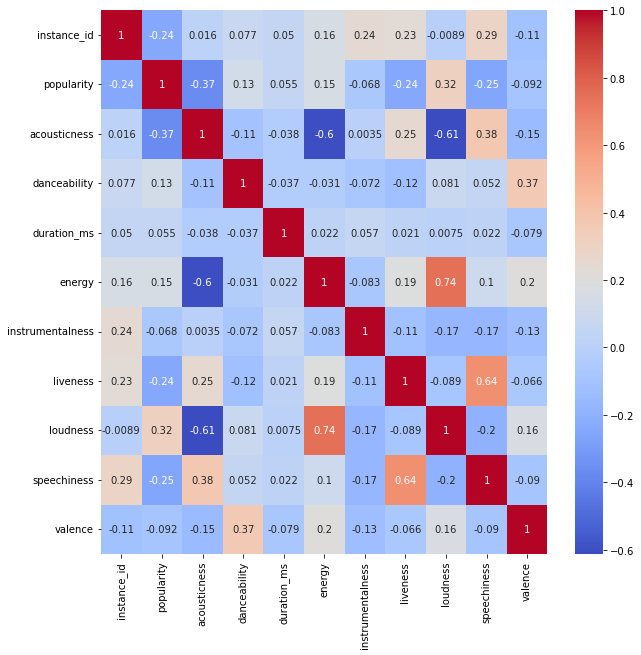

In [5]:
plt.figure(figsize=(10, 10))
relation = df.corr()
sns.heatmap(relation, annot=True, cmap="coolwarm")

-----
popularity
-0.3800502837407353
-0.564523615803703
-----
acousticness
0.5098279301475365
-1.3148348116945825
-----
danceability
-0.15854247899803373
-0.3031145563167472
-----
energy
-0.37725253252246643
-0.7485690523256321
-----
instrumentalness
2.587149998181351
5.35166294461585
-----
liveness
1.595154325334011
1.4862100296499783
-----
loudness
-1.192973972374231
2.071145334381824
-----
speechiness
2.2289326278991255
3.6268681858901743
-----
valence
0.1335660208493167
-0.9325715786027864


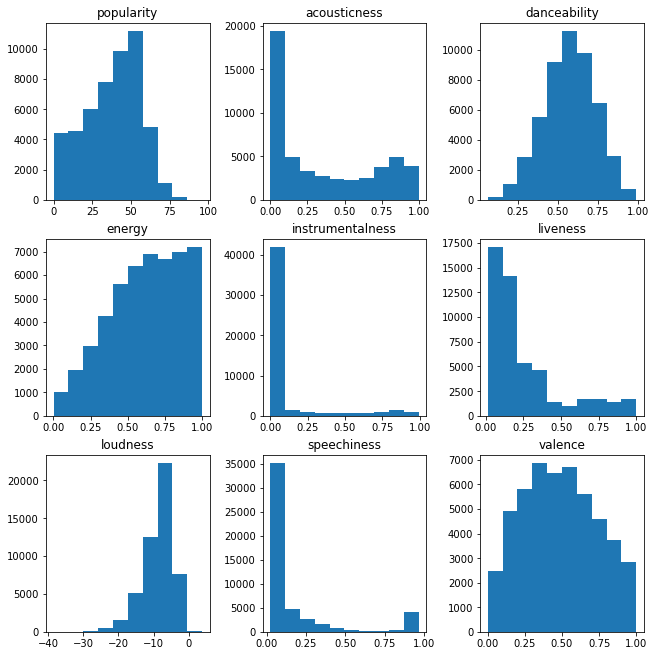

In [6]:
from scipy.stats import skew, kurtosis

def plot(df):
    fig, ax = plt.subplots(3, 3, figsize=(9,9), constrained_layout=True)

    over = df['popularity']
    ax[0][0].set_title("popularity")
    ax[0][0].hist(x=over, bins=10)
    print("-----")
    print('popularity')
    print(skew(over))
    print(kurtosis(over))


    over = df['acousticness']
    ax[0][1].set_title("acousticness")
    ax[0][1].hist(x=over, bins=10)
    print("-----")
    print('acousticness')
    print(skew(over))
    print(kurtosis(over))

    over = df['danceability']
    ax[0][2].set_title("danceability")
    ax[0][2].hist(x=over, bins=10)
    print("-----")
    print('danceability')
    print(skew(over))
    print(kurtosis(over))

    over = df['energy']
    ax[1][0].set_title("energy")
    ax[1][0].hist(x=over, bins=10)
    print("-----")
    print('energy')
    print(skew(over))
    print(kurtosis(over))

    over = df['instrumentalness']
    ax[1][1].set_title("instrumentalness")
    ax[1][1].hist(x=over, bins=10)
    print("-----")
    print('instrumentalness')
    print(skew(over))
    print(kurtosis(over))

    over = df['liveness']
    ax[1][2].set_title("liveness")
    ax[1][2].hist(x=over, bins=10)
    print("-----")
    print('liveness')
    print(skew(over))
    print(kurtosis(over))

    over = df['loudness']
    ax[2][0].set_title("loudness")
    ax[2][0].hist(x=over, bins=10)
    print("-----")
    print('loudness')
    print(skew(over))
    print(kurtosis(over))

    over = df['speechiness']
    ax[2][1].set_title("speechiness")
    ax[2][1].hist(x=over, bins=10)
    print("-----")
    print('speechiness')
    print(skew(over))
    print(kurtosis(over))

    over = df['valence']
    ax[2][2].set_title("valence")
    ax[2][2].hist(x=over, bins=10)
    print("-----")
    print('valence')
    print(skew(over))
    print(kurtosis(over))


plot(df)


-----
popularity
-0.46987917346970015
-1.4763863351126174
-----
acousticness
0.6579264493416448
-1.065939330110455
-----
danceability
-0.07672634334326403
-0.46557290752408775
-----
energy
-0.2179456416827269
-1.0470920229460972
-----
instrumentalness
2.72566747267233
6.039538465458424
-----
liveness
2.2372325488157925
5.939017874936237
-----
loudness
-1.0882380449068212
1.4566902977014875
-----
speechiness
3.661668824677231
17.111024673980527
-----
valence
0.053658638405773056
-0.9753411767318951


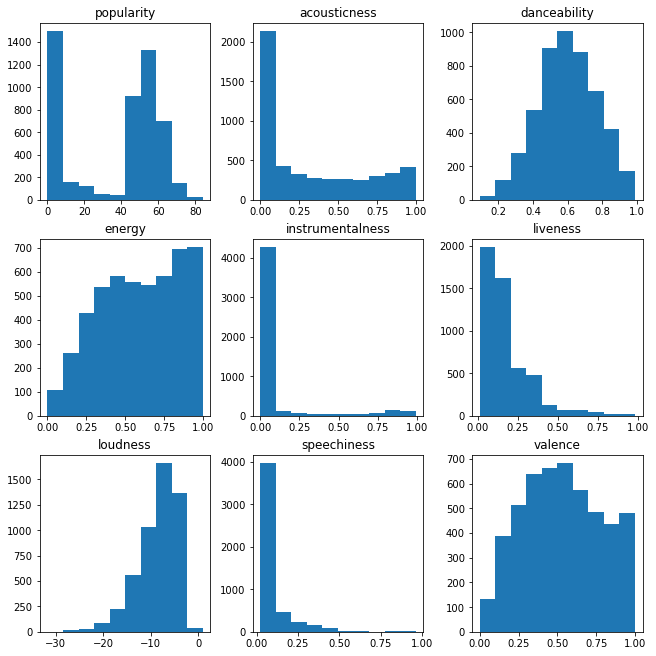

In [7]:
dataset = pd.read_csv('training-data/childrens music.csv')

plot(dataset)

In [8]:
#Reload training data to alter


dataset = pd.read_csv('training-data/alternative.csv')

#https://stackoverflow.com/questions/44706485/how-to-remove-rows-in-a-pandas-dataframe-if-the-same-row-exists-in-another-dataf
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)


train = dataset.copy(deep=True)

print(train.shape)

dataset = pd.read_csv('training-data/blues.csv')
dataset.rename(inplace=True, columns={'instnce_id':'instance_id'})#Typo in dataset
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/childrens music.csv')
#Songs that contain a swear word are in fact, unlikely to be a childrens song
dataset = dataset[dataset['track_name'].str.contains('fuck|shit|bitch', case=False)==False] 
#That ain't a kids song either
dataset = dataset[dataset['track_name'].str.contains('J. Cole', case=False)==False] 
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/comedy.csv')
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/electronic.csv')
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/folk.csv')
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/hip-hop.csv')
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/movie.csv')
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/ska.csv')
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)

dataset = pd.read_csv('training-data/soul.csv')
dataset = pd.merge(dataset, dup, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
dataset = fillMissing(dataset)
train = pd.concat([train, dataset], axis=0)
print(train.shape)



print(len(train.index))
#Remove bad instances

#print(train.loc[train['loudness'] < -37])
#These 2 instances have incredibly low loudness and very high acousticness
#train.drop(train.loc[train['loudness'] < -37].nsmallest(2, "loudness").index, inplace=True)
train = train.loc[train['loudness'] > -37]
print(len(train.index))

#These 2 instances had incredibly high tempo and acousticness and seemed uncharacteristic for
#children's music
train = train.loc[((train['tempo'] <= 220) | (train['genre'] != "Children's Music"))]
print(len(train.index))
                            

train.to_csv('fillMissing.csv')

#Experiment with track id
#train.loc[train['track_id'] == '6AIte2Iej1QKlaofpjCzW1'].head()
#r = pd.DataFrame(train['track_id'].value_counts())
#r['count'] = train['track_id'].value_counts()
#r.columns=['id', 'count']
#print(r.columns)
#print(r.loc[r['count']  > 1])


(4898, 19)
(9806, 19)
(14475, 19)
(19474, 19)
(24439, 19)
(29277, 19)
(34021, 19)
(39021, 19)
(44001, 19)
(48685, 19)
48685
48683
48681


In [9]:

train = encode(train)



missing = pd.DataFrame()
missing['Col'] = []
missing['Number'] = []
missing['Min'] = []
missing['Max'] = []
missing['dtypes'] = []


#print(train.max(axis=0))

missing['Max'] = train.max(axis=0).tolist()
missing['Min'] = train.min(axis=0).tolist()

#print(train.columns)
missing['Col'] = train.columns


dic = train['artist_name'].value_counts().to_dict()
num = dic['empty_field']

missing.loc[1,['Number']] = num

missing.loc[0,['Number']] = 0
missing.loc[2:3,['Number']] = 0 #Assuming none missing

num = len(train[train['popularity'] < 0])
missing.loc[4,['Number']] = num

num = len(train[train['acousticness'] < 0])
missing.loc[5,['Number']] = num

num = len(train[train['danceability'] < 0])
missing.loc[6,['Number']] = num

num = len(train[train['duration_ms'] < 0])
missing.loc[7,['Number']] = num

num = len(train[train['instrumentalness'] < 0])
missing.loc[9,['Number']] = num

num = len(train[train['tempo'] == '?'])
missing.loc[15,['Number']] = num



missing['dtypes'] = train.dtypes.tolist()




#missing.loc[missing['Col'] == 'instance_id'] 
#print(train['key'].value_counts())

#dup = df[df['track_id'] == '6sVQNUvcVFTXvlk3ec0ngd']

missing.head(19)

,Col,Number,Min,Max,dtypes
0,instance_id,0.0,43000,313859,int64
1,artist_name,9821.0,!!!,✝✝✝ (Crosses),object
2,track_name,0.0,"""99""",落書きペイジ,object
3,track_id,0.0,000CzNKC8PEt1yC3L8dqwV,7zzZmpw8L66ZPjH1M6qmOs,object
4,popularity,0.0,0,96,int64
5,acousticness,0.0,0.000001,0.996,float64
6,danceability,0.0,0.0617,0.989,float64
7,duration_ms,0.0,18000,4830606,int64
8,energy,NaN,0.000216,0.999,float64
9,instrumentalness,0.0,0.0,0.993,float64


In [10]:
def indexToGenre(num):
    if num == 0:
        return 'Alternative'
    elif num == 1:
        return 'Blues'
    elif num == 2:
        return "Children's Music"
    elif num == 3:
        return 'Comedy'
    elif num == 4:
        return 'Electronic'
    elif num == 5:
        return 'Folk'
    elif num == 6:
        return 'Hip-Hop'
    elif num == 7:
        return 'Movie'
    elif num == 8:
        return 'Ska'
    elif num == 9:
        return 'Soul'
    else:
        raise exception("Invalid")

In [11]:
class Artist:
    
    def updateGenre(self, genre):
        
        if genre not in self.genres:
            raise Exception("Not valid genre")
        
        self.genres[genre] = self.genres[genre] + 1
    
    def __init__(self, name, genre):
        self.name = name
        self.genres = {}
        
        self.genres['Alternative'] = 0
        self.genres['Blues'] = 0
        self.genres["Children's Music"] = 0
        self.genres['Comedy'] = 0
        self.genres['Electronic'] = 0
        self.genres['Folk'] = 0
        self.genres['Hip-Hop'] = 0
        self.genres['Movie'] = 0
        self.genres['Ska'] = 0
        self.genres['Soul'] = 0
        
        self.updateGenre(genre)
        
    #Get the proportions of the artists genres
    def scores(self):
        
        scores = []
        for i in range (10):
            scores.append(0)
        
        total = 0
        
        for i in range (10):
            
            key = indexToGenre(i)
            
            if i == 0:
                assert key == 'Alternative'
            elif i == 9:
                assert key == 'Soul'
            
            if self.genres[key] > 0:
                scores[i] = self.genres[key]
                total += self.genres[key]

            
        for i in range (10):
            scores[i] = scores[i] / (total * 1.0)
        
        return(scores)
    
    #Get count of each genre
    def counts(self):
        scores = []
        for i in range (10):
            scores.append(0)
        
        
        
        for i in range (10):
            
            key = indexToGenre(i)
            
            if i == 0:
                assert key == 'Alternative'
            
            if self.genres[key] > 0:
                scores[i] = self.genres[key]
                
            
            
            
        return(scores)
        
        
        
    
     #Get best in dic func
    # https://pythonguides.com/python-find-max-value-in-a-dictionary/#:~:text=In%20Python%20to%20find%20the%20minimum%20and%20maximum%20values%20in,minimum%20values%20in%20a%20dictionary.
    def getMax(self):
        max_val = list(self.genres.values())
        key = list(self.genres.keys())
        return (key[max_val.index(max(max_val))])
    
    def display(self):
        for key in self.genres:
            if self.genres[key] > 0:
                print(key, " ", self.genres[key])
            else:
                pass
        
    


In [12]:
#Create dictionary of artists

artists = train['artist_name'].tolist()
gens = train['genre'].tolist()

artDic = {}


for i in range (len(artists)):
    if artists[i] == 'empty_field':
        continue
    else:
        if artists[i] in artDic:
            artist = artDic[artists[i]]
            artist.updateGenre(gens[i])
        else:
            artDic[artists[i]] = Artist(artists[i], gens[i])
            




In [13]:
#Extract information about featuring artists
#Update artDic


artDic['J. Cole'].display()

te = train[train['track_name'].str.contains('feat |feat.|ft |ft.', case=False)]

import re

#$[)|\n)]
for index, row in te.iterrows():
    artists = re.findall(r"(\bfeat |\bfeat\.|\bft |\bft\.|\bFeat |\bFeat\.|\bFt |\bFt\.)(.+)", row['track_name'])
    #(feat |feat\.|ft |ft\.|Feat |Feat\.|Ft |Ft\.|Featuring ){1}(.+)
     
    #print(artists)
    
    
    
    if len(artists) == 1:
        name = artists[0]
        name = name[1].strip()
        
        index = name.find(")")
        if index != -1:
            name = name[:index]
        index = name.find("]")
        if index != -1:
            name = name[:index]
            
        index = name.find("-")
        if index != -1:
            name = name[:index]
        
        name = re.split(r",|&", name)
        
        gen = row['genre']
        
        print(name)
        
        
        for i in range ((len(name)) - 1):
            if name[i] == 'Tyler':
                if name[i+1] == ' The Creator' or name[i+1] == ' The Creator ':
                    name[i] = 'Tyler, The Creator'
                    name[i+1] = 'empty_field'
                    print("FOUND--------------")
            
        
        for n in name:
            n = n.strip()
            
            if n == 'empty_field':
                continue
            
            if n in artDic:
                artist = artDic[n]
                artist.updateGenre(gen)
            else:
                artDic[n] = Artist(n, gen)
        
   # print('----')
    

artDic['J. Cole'].display()
#te.head()


Hip-Hop   32
['Toro Y Moi']
['Wale']
['Tyler', ' The Creator ', ' Jay Prince']
FOUND--------------
['Iris DeMent']
['Joseph Chilliams ', ' Ravyn Lenae']
['Skepta ', ' Michael Phantom']
['Aceyalone']
['Daoud']
['Ty Dolla $ign']
['Konshens']
['BC Unidos']
['Becca Stevens ', ' Chris Thile']
['Jonathan Davis']
['Chali 2NA']
['Gavin DeGraw']
['Matthew West']
['Ruckazoid']
['Skrillex']
['Scarface']
['T']
['Carly Simon ', ' Kali Uchis']
['Tyler', ' The Creator ', ' Bootsy Collins']
FOUND--------------
['Josey Scott']
['Elohim']
['DRAM ', ' 6lack']
['DIAMANTE']
['T.I. ', ' DJ E']
['Popcaan']
['Zoë Kravitz']
['Syd']
['Yasiin Bey ', ' Black Thought']
['Rico Love']
['Rakim']
['Irfrane']
['Anthony Hamilton']
['Lincoln Jesser']
['38 Spesh ', ' Jadakiss']
['Cassie Jo Craig ', ' Irie Jane Gibbs']
['Sam Herring']
['Akenya ', ' Eryn Allen Kane']
['Anderson .Paak']
['Peewee Longway ', ' WaveIQ']
['Ty Dolla $ign']
['Lou Reed']
['Danny Brown ', ' Jhene Aiko']
['Krs.']
['Aloe Blacc']
['Fuego']
['Steve Lacy

In [14]:
#Testing artist's genres
print("Chromeo")
print(artDic['Chromeo'].getMax())
print("--")
print(artDic['Chromeo'].display())
print("###")
print("Bullet For My Valentine")
print(artDic['Bullet For My Valentine'].getMax())
print("--")
print(artDic['Bullet For My Valentine'].display())
print("###")
print("Pitbull")
print(artDic['Pitbull'].getMax())
print("--")
print(artDic['Pitbull'].display())
print("###")
print("Sango")
print(artDic['Sango'].getMax())
print("--")
print(artDic['Sango'].display())

print("###")
print("Usher")
print(artDic['Usher'].getMax())
print("--")
print(artDic['Usher'].display())

print("###")
print("Toro Y Moi")
print(artDic['Toro Y Moi'].getMax())
print("--")
print(artDic['Toro Y Moi'].display())


print("*******")
print(artDic['Chromeo'].scores())



Chromeo
Alternative
--
Alternative   4
Children's Music   1
None
###
Bullet For My Valentine
Children's Music
--
Alternative   7
Children's Music   8
None
###
Pitbull
Hip-Hop
--
Hip-Hop   12
None
###
Sango
Alternative
--
Alternative   3
Children's Music   2
Soul   2
None
###
Usher
Hip-Hop
--
Hip-Hop   15
None
###
Toro Y Moi
Alternative
--
Alternative   1
Children's Music   1
None
*******
[0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [15]:

train['Alternative'] = 0
train['Blues'] = 0
train["Children's Music"] = 0
train['Comedy'] = 0
train['Electronic'] = 0
train['Folk'] = 0
train['Hip-Hop'] = 0
train['Movie'] = 0
train['Ska'] = 0
train['Soul'] = 0


#Add values to training for best genre
for art in artDic:
    
   # scores = artDic[art].scores()
    
   # i = 0
   # for score in scores:
       # if score > 0:
        #    train.loc[train['artist_name'] == art, indexToGenre(i)] = score
        
       # i += 1
    
    best = artDic[art].getMax() #Old just had best
    train.loc[train['artist_name'] == art, best] = 1



train.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,Alternative,Blues,Children's Music,Comedy,Electronic,Folk,Hip-Hop,Movie,Ska,Soul
0,50010,Chromeo,Come Alive (feat. Toro Y Moi),0ZulY8etRzj54NLYOYX7jy,43,0.225000,0.845,238680,0.746,0.000088,...,1,0,0,0,0,0,0,0,0,0
1,50011,Sango,How Do You Love Me,1jgkBLmR16qqZzEG5LYZN5,47,0.665000,0.862,166154,0.342,0.000082,...,1,0,0,0,0,0,0,0,0,0
2,50012,Counting Crows,Omaha,50o13VmOJiUj3WfU7XmEAn,48,0.238000,0.590,219400,0.517,0.000000,...,1,0,0,0,0,0,0,0,0,0
3,50013,Bullet For My Valentine,Over It,5BRGRuHRfvGgoIvZg3PE3x,60,0.000077,0.374,187304,0.971,0.000000,...,0,0,1,0,0,0,0,0,0,0
4,50014,Shinedown,Asking For It,0BpgI6YcYv3ENGLp7XJsAH,58,0.002730,0.449,187304,0.971,0.000000,...,1,0,0,0,0,0,0,0,0,0


In [16]:
#Get the index of the highest number in a list
def getBest(counts):
    best = counts[0]
    index = 0
    
    for i in range (len(counts)):
        if counts[i] > best:
            index = i
            best = counts[i]
    
    return index

In [17]:
def ftEncode(df):

    te = df[df['track_name'].str.contains('feat |feat.|ft |ft.', case=False)]



    df['ft_Alternative'] = 0
    df['ft_Blues'] = 0
    df["ft_Children's Music"] = 0
    df['ft_Comedy'] = 0
    df['ft_Electronic'] = 0
    df['ft_Folk'] = 0
    df['ft_Hip-Hop'] = 0
    df['ft_Movie'] = 0
    df['ft_Ska'] = 0
    df['ft_Soul'] = 0




    for index, row in te.iterrows():
        artists = re.findall(r"(\bfeat |\bfeat\.|\bft |\bft\.|\bFeat |\bFeat\.|\bFt |\bFt\.)(.+)", row['track_name'])

        if len(artists) == 1:
            name = artists[0]
            name = name[1].strip()

            index = name.find(")")
            if index != -1:
                name = name[:index]
            index = name.find("]")
            if index != -1:
                name = name[:index]

            index = name.find("-")
            if index != -1:
                name = name[:index]

            name = re.split(r",|&", name)

           

            for i in range ((len(name)) - 1):
                if name[i] == 'Tyler':
                    if name[i+1] == ' The Creator' or name[i+1] == ' The Creator ':
                        name[i] = 'Tyler, The Creator'
                        name[i+1] = 'empty_field'



            count = []
            for i in range (10):
                count.append(0)

            #Calculate score of every artist
            for n in name:
                n = n.strip()

                if n == 'empty_field' or n not in artDic:
                    continue
                
                
                
                counts = artDic[n].counts()

                i = 0
                for c in counts:
                    count[i] += c

            genre = indexToGenre(getBest(count))


            df.loc[df['instance_id'] == row['instance_id'], "ft_" + genre] = 1
            
    return(df)
      
    
train = ftEncode(train)

train.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,ft_Alternative,ft_Blues,ft_Children's Music,ft_Comedy,ft_Electronic,ft_Folk,ft_Hip-Hop,ft_Movie,ft_Ska,ft_Soul
0,50010,Chromeo,Come Alive (feat. Toro Y Moi),0ZulY8etRzj54NLYOYX7jy,43,0.225000,0.845,238680,0.746,0.000088,...,1,0,0,0,0,0,0,0,0,0
1,50011,Sango,How Do You Love Me,1jgkBLmR16qqZzEG5LYZN5,47,0.665000,0.862,166154,0.342,0.000082,...,0,0,0,0,0,0,0,0,0,0
2,50012,Counting Crows,Omaha,50o13VmOJiUj3WfU7XmEAn,48,0.238000,0.590,219400,0.517,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,50013,Bullet For My Valentine,Over It,5BRGRuHRfvGgoIvZg3PE3x,60,0.000077,0.374,187304,0.971,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,50014,Shinedown,Asking For It,0BpgI6YcYv3ENGLp7XJsAH,58,0.002730,0.449,187304,0.971,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#https://datatofish.com/substring-pandas-dataframe/
#Got contains in dataframe

mv = train[train['track_name'].str.contains('From "', case=False)]
mv = mv[~mv['track_name'].str.contains('Soundtrack|Single', case=False)]
print(mv['genre'].value_counts())
#print(mv['genre'])

Movie               276
Children's Music     24
Hip-Hop               8
Soul                  4
Blues                 3
Folk                  2
Alternative           1
Electronic            1
Name: genre, dtype: int64


In [19]:
te = train[train['track_name'].str.contains('Remix', case=False)]
print(te['genre'].value_counts())

Electronic          510
Soul                121
Hip-Hop              88
Alternative          51
Children's Music     30
Folk                 29
Blues                25
Movie                19
Ska                  11
Comedy                1
Name: genre, dtype: int64


In [20]:
te = train[train['track_name'].str.contains('feat |feat.|ft |ft.', case=False)]
print(te['genre'].value_counts())

Hip-Hop             830
Electronic          460
Alternative         244
Soul                236
Children's Music    133
Blues                72
Movie                60
Folk                 56
Ska                  44
Comedy               24
Name: genre, dtype: int64


In [21]:
te = train[train['track_name'].str.contains('Live', case=False)]
print(te['genre'].value_counts())

Blues               338
Comedy              260
Movie               209
Ska                 204
Alternative         113
Folk                 97
Soul                 78
Electronic           68
Children's Music     67
Hip-Hop              20
Name: genre, dtype: int64


In [22]:
te = train[train['track_name'].str.contains('Remaster', case=False)]
print(te['genre'].value_counts())

Blues               260
Folk                186
Movie               127
Ska                 117
Electronic          110
Soul                 85
Alternative          75
Comedy               50
Children's Music     49
Hip-Hop              15
Name: genre, dtype: int64


In [23]:
te = train[train['track_name'].str.contains('Intro', case=False)]
print(te['genre'].value_counts())

Comedy              36
Movie               19
Hip-Hop             18
Electronic          13
Ska                  9
Soul                 6
Children's Music     5
Alternative          3
Blues                2
Folk                 2
Name: genre, dtype: int64


In [24]:
te = train[train['track_name'].str.contains('Sex', case=False)]
print(te['genre'].value_counts())

Comedy              60
Alternative         10
Hip-Hop              9
Children's Music     8
Soul                 8
Folk                 5
Ska                  5
Blues                3
Movie                3
Name: genre, dtype: int64


In [25]:
te = train[train['track_name'].str.contains('guy', case=False)]
print(te['genre'].value_counts())

Comedy              39
Movie                9
Hip-Hop              7
Ska                  7
Folk                 5
Soul                 4
Blues                1
Children's Music     1
Electronic           1
Name: genre, dtype: int64


In [26]:
te = train[train['track_name'].str.contains('El |Sol|sol| el | y ', case=True)]
print(te['genre'].value_counts())

#|ó|á|è|ñ|é
#La Receta - Versión 25 Años [Live] 
#Cae El Sol - Me Verás Volver Gira 2007
#La Sirène
#Té para Tres

Ska                 140
Comedy               45
Hip-Hop              34
Children's Music     30
Alternative          28
Electronic           24
Movie                23
Blues                16
Soul                 12
Folk                 11
Name: genre, dtype: int64


In [27]:
te = train[train['track_name'].str.contains('instrumental', case=False)]
print(te['genre'].value_counts())

Children's Music    72
Movie               16
Electronic          13
Blues                4
Hip-Hop              4
Alternative          3
Folk                 2
Name: genre, dtype: int64


In [28]:
te = train[train['track_name'].str.contains('love', case=False)]
print(te['genre'].value_counts())

Soul                386
Blues               228
Folk                195
Movie               146
Alternative         123
Electronic          104
Children's Music     93
Hip-Hop              80
Ska                  76
Comedy               51
Name: genre, dtype: int64


In [29]:
te = train[train['track_name'].str.contains('vocal', case=False)]
print(te['genre'].value_counts())

Children's Music    29
Movie                4
Alternative          2
Blues                2
Electronic           1
Ska                  1
Name: genre, dtype: int64


In [30]:
te = train[train['track_name'].str.contains('red|blue|green|white|black|yellow', case=False)]
print(te['genre'].value_counts())

Blues               464
Folk                295
Movie               243
Children's Music    172
Comedy              169
Electronic          166
Alternative         165
Soul                149
Hip-Hop             100
Ska                  99
Name: genre, dtype: int64


In [31]:
te = train[train['track_name'].str.contains('\(with', case=False)]
te = te[te['artist_name'].str.contains('empty_field')]
print(te['genre'].value_counts())

te.head(30)

Hip-Hop             6
Alternative         3
Blues               3
Soul                2
Children's Music    1
Comedy              1
Electronic          1
Movie               1
Name: genre, dtype: int64


,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,ft_Alternative,ft_Blues,ft_Children's Music,ft_Comedy,ft_Electronic,ft_Folk,ft_Hip-Hop,ft_Movie,ft_Ska,ft_Soul
134,50144,empty_field,Burning Man (with Post Malone),3tKpu4LI70iBUOQV9YhDEl,44,0.01140,0.570,197507,0.883,0.000002,...,0,0,0,0,0,0,0,0,0,0
1132,51142,empty_field,Eres para Mí (with Anita Tijoux),67hnL3LuKs6JiphyY6SHgl,59,0.07010,0.800,192760,0.685,0.000006,...,0,0,0,0,0,0,0,0,0,0
2570,52580,empty_field,Redemption (with Babes Wodumo),7CZBN6FOTHgov589VF4hnG,57,0.13900,0.778,222093,0.765,0.027400,...,0,0,0,0,0,0,0,0,0,0
370,60371,empty_field,The Healing Game (with Van Morrison),5lHahTxTKxsQbE4YJlJDWB,29,0.69100,0.654,309187,0.313,0.000054,...,0,0,0,0,0,0,0,0,0,0
4521,64522,empty_field,If You Were Mine (with Teddy Wilson & His Orch...,2lyEpuvVOnNGzV5c89Vnpf,36,0.96800,0.615,189867,0.115,0.000610,...,0,0,0,0,0,0,0,0,0,0
4951,64952,empty_field,Cocaine (with J. J. Cale) - Live at Ipayone Ce...,3QNVDWzBXxbwWcBwZc79qM,34,0.27700,0.663,199656,0.889,0.774000,...,0,0,0,0,0,0,0,0,0,0
764,80846,empty_field,FENTY SEX (with Dreezy),4vPJK1gKyygRS2mep7iyDq,55,0.71000,0.563,214977,0.521,0.000003,...,0,0,0,0,0,0,0,0,0,0
1344,203264,empty_field,Here's Your Sign (Get the Picture) (with Speci...,2FlbiceZnWgzPoUGCviLHT,21,0.33700,0.586,220173,0.936,0.000000,...,0,0,0,0,0,0,0,0,0,0
4773,313633,empty_field,Love Foolosophy (with Beverley Knight) - Radio...,7jekPKOkmYemuvV60fnuFt,58,0.01190,0.799,213912,0.690,0.000029,...,0,0,0,0,0,0,0,0,0,0
369,71360,empty_field,Stuck (with Arin Ray),4UOSM66BYQRD4YbOIkcTO8,62,0.09940,0.509,176260,0.689,0.000073,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Adding in track_name features

#mv = train[train['track_name'].str.contains('From "', case=False)]
#mv = mv[~mv['track_name'].str.contains('Soundtrack|Single', case=False)]

def trackNameEncode(df):
    df['tn_from'] = 0
    df['tn_instrumental'] = 0
    df['tn_vocal'] = 0
    df['tn_feat'] = 0
    df['tn_remix'] = 0
    
    df['tn_remaster'] = 0
    df['tn_love'] = 0
    df['tn_live'] = 0
    
    mv = df[df['track_name'].str.contains('From "', case=False)]
    mv = mv[~mv['track_name'].str.contains('Soundtrack|Single', case=False)]
   
    
    for index, row in mv.iterrows():
        #print(row['c1'], row['c2'])
        df.loc[df['instance_id'] == row['instance_id'], 'tn_from'] = 1
    
    #df.loc[df['instance_id'] == mv['instance_id'], 'tn_from'] = 1
    
    df.loc[df['track_name'].str.contains('instrumental', case=False), 'tn_instrumental'] = 1
    df.loc[df['track_name'].str.contains('feat', case=False), 'tn_feat'] = 1
    df.loc[df['track_name'].str.contains('vocal', case=False), 'tn_vocal'] = 1
    df.loc[df['track_name'].str.contains('remix', case=False), 'tn_remix'] = 1
    
    df.loc[df['track_name'].str.contains('remaster', case=False), 'tn_remaster'] = 1
    df.loc[df['track_name'].str.contains('love', case=False), 'tn_love'] = 1
    df.loc[df['track_name'].str.contains('live', case=False), 'tn_live'] = 1
    
    return(df)
    


In [33]:
#train = trackNameEncode(train)

train = train.drop(columns=['instance_id', 'artist_name', 'track_name', 'track_id'], axis=1)
y = train['genre']
train = train.drop(columns=['genre'], axis=1)
#print(y)
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,ft_Alternative,ft_Blues,ft_Children's Music,ft_Comedy,ft_Electronic,ft_Folk,ft_Hip-Hop,ft_Movie,ft_Ska,ft_Soul
0,43,0.225000,0.845,238680,0.746,0.000088,5,0.0785,-5.655,0,...,1,0,0,0,0,0,0,0,0,0
1,47,0.665000,0.862,166154,0.342,0.000082,10,0.1020,-10.095,0,...,0,0,0,0,0,0,0,0,0,0
2,48,0.238000,0.590,219400,0.517,0.000000,9,0.1820,-9.239,1,...,0,0,0,0,0,0,0,0,0,0
3,60,0.000077,0.374,187304,0.971,0.000000,11,0.3220,-4.284,0,...,0,0,0,0,0,0,0,0,0,0
4,58,0.002730,0.449,187304,0.971,0.000000,10,0.1410,-3.660,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
clf.fit(train, y)

trainPred = clf.predict(train)
print(accuracy_score(trainPred, y))


#wrong = y.loc[trainPred != y]
#print(wrong.shape[0])
#print(wrong['genre'].value_counts())
#wrong.head()

1.0


In [35]:
def genreToIndex(genre):
    if genre == 'Alternative':
        return 0
    elif genre == 'Blues':
        return 1
    elif genre == "Children's Music":
        return 2
    elif genre == 'Comedy':
        return 3
    elif genre == 'Electronic':
        return 4
    elif genre == 'Folk':
        return 5
    elif genre == 'Hip-Hop':
        return 6
    elif genre == 'Movie':
        return 7
    elif genre == 'Ska':
        return 8
    elif genre == 'Soul':
        return 9
    else:
        raise Exception("baddd")

In [36]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)


yCopy = np.copy(y)

for i in range (len(yCopy)):
    yCopy[i] = genreToIndex(yCopy[i])
    

xgb_model.fit(train, yCopy)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dupCopy = dup.copy(deep=True)


dupCopy = fillMissing(dupCopy)
dupCopy = encode(dupCopy)

dupCopy['Alternative'] = 0
dupCopy['Blues'] = 0
dupCopy["Children's Music"] = 0
dupCopy['Comedy'] = 0
dupCopy['Electronic'] = 0
dupCopy['Folk'] = 0
dupCopy['Hip-Hop'] = 0
dupCopy['Movie'] = 0
dupCopy['Ska'] = 0
dupCopy['Soul'] = 0


for art in artDic:
    
    best = artDic[art].getMax() #Old just had best
    dupCopy.loc[dupCopy['artist_name'] == art, best] = 1
        

dupCopy = ftEncode(dupCopy)


#test = trackNameEncode(test)

dupCopy = dupCopy.drop(columns=['instance_id', 'artist_name', 'track_name', 'track_id'], axis=1)

dupCopy = dupCopy.drop(columns=['genre'], axis=1)


dupPred = xgb_model.predict(dupCopy)

print(train.shape)

i = 0
correct = pd.DataFrame(columns=train.columns)
for index, row in dup.iterrows():
    #print("-----------")
    #print(dupPred[i])
    #print(genreToIndex(row['genre']))
    if dupPred[i] == genreToIndex(row['genre']):
        train = train.append(dupCopy.iloc[i])
        correct = correct.append(dupCopy.iloc[i])
        yCopy = np.append(yCopy, dupPred[i])
        y = np.append(y, row['genre'])
        #print(correct)
    else:
        pass
    
    i += 1
    
    
print(correct.shape)
print(train.shape)


xgb_model.fit(train, yCopy)


correct.head(30)

(48681, 34)
(412, 34)
(49093, 34)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,ft_Alternative,ft_Blues,ft_Children's Music,ft_Comedy,ft_Electronic,ft_Folk,ft_Hip-Hop,ft_Movie,ft_Ska,ft_Soul
41,48.0,0.751,0.307,187305.0,0.632,0.000005,9.0,0.0899,-7.115,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,49.0,0.271,0.784,187305.0,0.384,0.00193,8.0,0.0687,-9.295,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,50.0,0.0712,0.671,247507.0,0.763,0.000655,2.0,0.171,-6.078,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,48.0,0.0482,0.529,215093.0,0.754,0.00598,0.0,0.108,-3.167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694,52.0,0.0573,0.653,197373.0,0.68,0.000002,1.0,0.0683,-5.351,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
980,47.0,0.115,0.568,238148.0,0.916,0.000464,6.0,0.0779,-5.327,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1011,46.0,0.645,0.582,187305.0,0.365,0.000001,9.0,0.147,-11.04,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1136,54.0,0.284,0.69,187305.0,0.332,0.000513,5.0,0.0931,-11.148,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,51.0,0.65,0.82,216147.0,0.415,0.000076,8.0,0.144,-8.163,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,50.0,0.0209,0.776,187305.0,0.408,0.0248,4.0,0.17,-5.712,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#THIS IS THE FINAL MODEL I USED!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

test = pd.read_csv('test-data/test.csv')

#print(test.max())
#print(test.min())
test = fillMissing(test)
test = encode(test)

ids = test['instance_id']


test['Alternative'] = 0
test['Blues'] = 0
test["Children's Music"] = 0
test['Comedy'] = 0
test['Electronic'] = 0
test['Folk'] = 0
test['Hip-Hop'] = 0
test['Movie'] = 0
test['Ska'] = 0
test['Soul'] = 0


for art in artDic:
    
   # scores = artDic[art].scores()
    
   # i = 0
    #for score in scores:
       # if score > 0:
        #    test.loc[test['artist_name'] == art, indexToGenre(i)] = score
        
      #  i += 1
    best = artDic[art].getMax() #Old just had best
    test.loc[test['artist_name'] == art, best] = 1
        

test = ftEncode(test)


#test = trackNameEncode(test)

test = test.drop(columns=['instance_id', 'artist_name', 'track_name', 'track_id'], axis=1)

gen = xgb_model.predict(test)

f = open("xgbsubmit10.csv", "w")
f.write("instance_id,genre\n")

for i in range (len(gen)):
    f.write('{},{}\n'.format(ids[i], indexToGenre(gen[i])))



f.close()

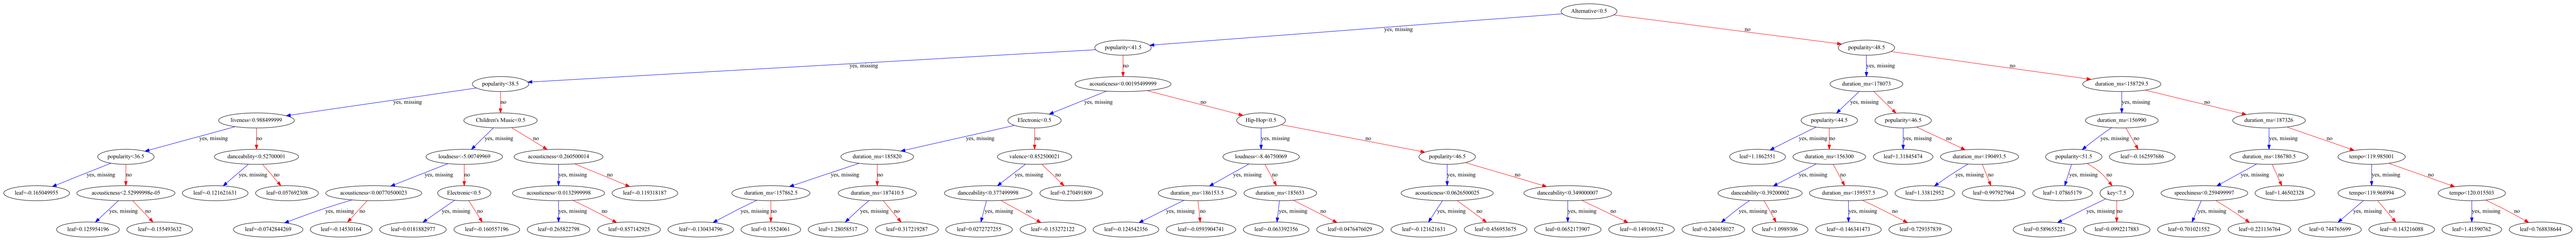

In [48]:
#Needs graphviz downloaded

from xgboost import plot_tree
plot_tree(xgb_model)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier()
scores = cross_val_score(classifier, train, y, cv=5)
print(scores)

In [ ]:


test = pd.read_csv('test-data/test.csv')

#print(test.max())
#print(test.min())
test = fillMissing(test)
test = encode(test)

ids = test['instance_id']


test['Alternative'] = 0
test['Blues'] = 0
test["Children's Music"] = 0
test['Comedy'] = 0
test['Electronic'] = 0
test['Folk'] = 0
test['Hip-Hop'] = 0
test['Movie'] = 0
test['Ska'] = 0
test['Soul'] = 0


for art in artDic:
    
    scores = artDic[art].scores()
    
    i = 0
    for score in scores:
        if score > 0:
            test.loc[test['artist_name'] == art, indexToGenre(i)] = score
        
        i += 1
        

test = ftEncode(test)


#test = trackNameEncode(test)

test = test.drop(columns=['instance_id', 'artist_name', 'track_name', 'track_id'], axis=1)

gen = clf.predict(test)

f = open("submit3.csv", "w")
f.write("instance_id,genre\n")

for i in range (len(gen)):
    f.write('{},{}\n'.format(ids[i], gen[i]))


f.close()
